Necessary Imports 

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files                        #import of files from local disk
import io
import pandas as pd
import re

import string                                       #to remove punctuations in out sentences
string.punctuation

import nltk                                 #imports for Lemmatization
nltk.download('stopwords')  
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer                   #for comparision with Naive Bayes Library
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
nltk.download('omw-1.4')

data = files.upload()           #uploading csv files
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Saving test_data.csv to test_data (3).csv
Saving train_data.csv to train_data (3).csv


transferring datasets into dataframes

In [176]:
Train_df = pd.read_csv(io.StringIO(data['train_data.csv'].decode('utf-8')))               #data saving into dataframe
Test_df = pd.read_csv(io.StringIO(data['test_data.csv'].decode('utf-8')))
Train_df.head()

Unnamed: 0  Sentence_id  \
0  0           GERRES15609   
1  1           PHERES15784   
2  2           GERREQ10457   
3  3           GERSKL27235   
4  4           HONSSK18415   

                                                                                                                                                                    New_Sentence  \
0  Author and/or Review architecture/design and other technical documents ensuring high quality deliverables and systems development across tech stacks  and applications teams.   
1  Should be able to develop custom dynamic shape, object script and  validation and testing with database.                                                                        
2  Experience in working crosslly with a  larger Engineering Organization and multiple sites highly desired.                                                                       
3  Previous business experience, including but not limited to business  management, engineering, sales, operations, finance, contracts, customer support.                          
4  Delivering fast and right the first  time.                                                                                                                                      

             Type  
0  Responsibility  
1  Responsibility  
2  Requirement     
3  Skill           
4  SoftSkill

In [177]:
Test_df.head()

Unnamed: 0  Sentence_id  \
0  0           UAERES16346   
1  1           COGREQ15586   
2  2           UAEREQ12722   
3  3           COGSKL29155   
4  4           PHERES12551   

                                                                                                                                                                                                                            New_Sentence  
0  Collaborate across all of DB&T practices and offerings in AI, Data, IoT  and Cloud platforms to ensure we grow share in world class digital innovation, mobile/web applications helping clients reinvent their businesses.             
1  Strong  technology expertise in Identity and Access Management.                                                                                                                                                                        
2  Strong knowledge on Service  Virtualization.                                                                                                                                                                                           
3  Architect scalable data processing and analytics solutions, including technical feasibility for Big Data storage, processing, and consumption e.g., development  of enterprise Data Lake strategy, and heterogeneous data management.  
4  Map client organization, build outstanding relationships with new business units,  and build a sales strategy for developing new business opportunities.

In [178]:
Train_df.head()
df = Train_df.dropna()                                  #dropping null values from our dataframe
print("Before dropping Null values", Train_df.shape)
print("After dropping Null Values", df.shape)

Before dropping Null values (60115, 4)
After dropping Null Values (59002, 4)


Plot Type of Sentence as per their count of values

value counts for each sentence type
 Responsibility    15257
Requirement       13878
SoftSkill         9416 
Experience        9078 
Skill             6833 
Education         4540 
Name: Type, dtype: int64


<BarContainer object of 6 artists>

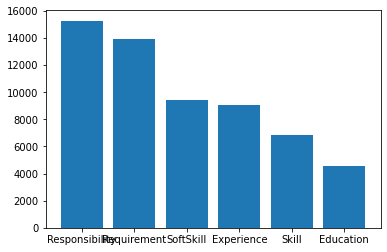

In [179]:
H = df['Type'].value_counts()
# X = np.unique(df['Type'])
print("value counts for each sentence type\n", H) 
# print(X)
X = ['Responsibility', 'Requirement', 'SoftSkill', 'Experience', 'Skill', 'Education']
# plt.bar(df['Type'], df['Type'].value_counts())
plt.bar(X, df['Type'].value_counts())

Removing punctuations and convering them to lowercase
Lemmatizing the words

In [180]:
from nltk.corpus.reader import wordnet
lemmatizer = WordNetLemmatizer()
def Remove_punct(t):
  pf_t = "".join([ i for i in t if i not in string.punctuation])
  removeL=""
  res = re.sub('','',pf_t)          #remove HTML tags
  res = re.sub('https://.*','',res)   #remove URLs
  res = re.sub(r'[^w'+removeL+']', ' ',res)    #remove non-alphanumeric characters 
  return pf_t

def extraction(df):
  stop_word_list = set(stopwords.words('english'))
  pd.set_option('display.max_colwidth', -1)
  df = df[['New_Sentence', 'Type']]
  df['New_Sentence'] = df['New_Sentence'].apply(lambda x: Remove_punct(x))            #calling function to Remove punctuations, HTML tags, URLs, non-alphanumeric characters
  df['New_Sentence'] = df['New_Sentence'].apply(lambda x: x.lower())                  #converting each sentence to lower case
  df['New_Sentence'] = df['New_Sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_word_list)]))   #removing stopwords
  return df
Train = extraction(df)       #printing value counts for each class
Train.shape             #final dataset count
# Train.head(54)             


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app

(59002, 2)

Coverting class labels into mathematical labels (0,1,2,3,4,5) as mathematical calculations are easy

In [181]:
from sklearn.preprocessing import LabelEncoder
def Convert(labels):
  encoder = LabelEncoder()
  encoded = encoder.fit_transform(labels)
  return encoded
data = Train['New_Sentence'].values
labels = Train['Type'].values
target = Convert(labels)
for i in range(15):
  print(target[i], Train['Type'][i])
Dict1 = { 0: 'Education', 1:'Experience', 2:'Requirement', 3:'Responsibility', 4:'Skill', 5:'Softskill'}

3 Responsibility
3 Responsibility
2 Requirement
4 Skill
5 SoftSkill
3 Responsibility
3 Responsibility
2 Requirement
2 Requirement
0 Education
5 SoftSkill
2 Requirement
3 Responsibility
5 SoftSkill
3 Responsibility


In [182]:
print(Dict1)

{0: 'Education', 1: 'Experience', 2: 'Requirement', 3: 'Responsibility', 4: 'Skill', 5: 'Softskill'}


Splitting the dataset

In [183]:
from sklearn.model_selection import train_test_split
print(target[0:10])
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size =0.2, stratify = target )

[3 3 2 4 5 3 3 2 2 0]


transforming words into token and making a dictionary of them

In [185]:
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer                       #for our model to be accurate you do not have to pass anything in Count vectorizer
vec = CountVectorizer(max_features = 3000)           #pass max_features = (some limit) else it'll run for around half an hour, 
X = vec.fit_transform(X_train)                       #transforming word to vectors
vocab = vec.get_feature_names()                     #extracting each word, building vocabulary
X = X.toarray()
w_counts = {}
for l in range(6):
    w_counts[l] = defaultdict(lambda: 0)          #empty dictionary as per labels
for i in range(X.shape[0]):
    l = y_train[i]
    for j in range(len(vocab)):                  
        w_counts[l][vocab[j]] += X[i][j]

fitting on our training data

In [187]:
def fit(X, y, labels):
    label_items = {}
    priors = {}
    gd = {}
    n = len(X)
    for lb in labels:
      gd[lb] = X[np.where(y == lb)]                              # grouped_data = group_by_label(x, y, labels)
    for lb, d in gd.items():                                    #interating over each label and data 
        label_items[lb] = len(d)
        priors[lb] = (label_items[lb] / n)                      #calculating prior probablity of each label
    return label_items, priors
labels = [0,1, 2, 3, 4, 5]  
label_items, label_priors = fit(X_train,y_train,labels)

Predicting without Laplace Smoothening

In [188]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
def predict(label_items, vocab, word_counts, label_priors, labels, x):
    result = []
    n = len(vocab)
    for text in x:
        scores_label = {l: label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
          if word in vocab: continue
          for l in labels:
              a,b = 0,0
              a = w_counts[l][word]                             #applying laplace smoothening (adding 1 to text vectore not in our vocabulary)
              if a == 0:                                          #if occurence is 0 we pass the string since we cannot divide 0
                continue
              b = label_items[l] + n
              scores_label[l] += (a/b)
        result.append(max(scores_label, key=scores_label.get))
    return result

In [189]:
from sklearn.metrics import accuracy_score                                                        #importing accuracy score to calculate
pred = predict(label_items, vocab, w_counts, label_priors, labels, X_val)                     #deriving predictions
print("Accuracy of prediction on test set : ", accuracy_score(y_val,pred))

Accuracy of prediction on test set :  0.2585374120837217


25 %, our accuracy is very low, 
Without Laplace Smoothening

Let us check with Laplace Smoothening

In [190]:
def predict(label_items, vocab, w_counts, label_priors, labels, x):
    result = []
    n = len(vocab)
    for text in x:
        scores_label = {l: label_priors[l] for l in labels}
        words = set(w_tokenizer.tokenize(text))
        for word in words:
            if word not in vocab: continue
            for l in labels:
                a,b = 0,0
                a = w_counts[l][word] + 1                              #applying laplace smoothening (adding 1 to text vectore not in our vocabulary)
                b = label_items[l] + n
                scores_label[l] += np.math.log(a/b)
        result.append(max(scores_label, key=scores_label.get))
    return result

In [191]:
from sklearn.metrics import accuracy_score                                                        #importing accuracy score to calculate
pred = predict(label_items, vocab, w_counts, label_priors, labels, X_val)                     #deriving predictions
print("Accuracy of prediction on test set : ", accuracy_score(y_val,pred))

Accuracy of prediction on test set :  0.6684179306838404


NBC Sklearn

In [192]:
nb = make_pipeline(TfidfVectorizer(), MultinomialNB())
nb.fit(X_train, y_train)
preds_new = nb.predict(X_val)
acc = accuracy_score(preds_new , y_val )
print(acc)

0.6851961698161173


Let us predict our Test Set

In [193]:
print("Before dropping Na values", Test_df.shape)
df = Test_df.dropna()
print("After dropping Na values", df.shape)

Before dropping Na values (15029, 3)
After dropping Na values (14748, 3)


Pre-process our testset

In [194]:
def Remove_punct_pred(t):
  if type(t) == int or type(t) == float:
    return
  pf_t = "".join([ i for i in t if i not in string.punctuation])
  removeL=""
  res = re.sub('','',pf_t)          #remove HTML tags
  res = re.sub('https://.*','',res)   #remove URLs
  res = re.sub(r'[^w'+removeL+']', ' ',res)    #remove non-alphanumeric characters
  return pf_t

def extraction(df):
  stop_word_list = set(stopwords.words('english'))
  pd.set_option('display.max_colwidth', -1)
  df = df.drop(['Sentence_id'], axis=1)
  df['New_Sentence'] = df['New_Sentence'].apply(lambda x: Remove_punct_pred(x))            #calling function to Remove punctuations, HTML tags, URLs, non-alphanumeric characters
  df = df.dropna()
  df['New_Sentence'] = df['New_Sentence'].apply(lambda x: x.lower())                  #converting each sentence to lower case
  df['New_Sentence'] = df['New_Sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in (stop_word_list)]))   #removing stopwords
  return df

df = extraction(Test_df)                                                       
X_test = df['New_Sentence'].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


In [195]:
print(Test_df['New_Sentence'][0:10])

0    Collaborate across all of DB&T practices and offerings in AI, Data, IoT  and Cloud platforms to ensure we grow share in world class digital innovation, mobile/web applications helping clients reinvent their businesses.           
1    Strong  technology expertise in Identity and Access Management.                                                                                                                                                                      
2    Strong knowledge on Service  Virtualization.                                                                                                                                                                                         
3    Architect scalable data processing and analytics solutions, including technical feasibility for Big Data storage, processing, and consumption e.g., development  of enterprise Data Lake strategy, and heterogeneous data management.
4    Map client organization, build outstanding relationship

Predicting using model built by us

In [196]:
preds = predict(label_items, vocab, w_counts, label_priors, labels, X_test)
for i in range(10):
  print( Dict1[preds[i]].upper())

RESPONSIBILITY
SKILL
SKILL
RESPONSIBILITY
RESPONSIBILITY
RESPONSIBILITY
SKILL
RESPONSIBILITY
SKILL
REQUIREMENT


PRedicting using Naive Bayes from Sklearn.

In [197]:
preds_new_test = nb.predict(X_test)
for i in range(10):
  print(Dict1[preds_new_test[i]].upper())

RESPONSIBILITY
REQUIREMENT
SKILL
RESPONSIBILITY
RESPONSIBILITY
RESPONSIBILITY
REQUIREMENT
RESPONSIBILITY
RESPONSIBILITY
REQUIREMENT
